Number of cities:  493
Number of states:  29
Most number of cities are in the state:  UTTAR PRADESH
Number of cities over there:  63
Least number of cities belong to these states and their counts:
CHANDIGARH                   1
HIMACHAL PRADESH             1
MEGHALAYA                    1
TRIPURA                      1
NAGALAND                     1
MIZORAM                      1
ANDAMAN & NICOBAR ISLANDS    1
MANIPUR                      1
Name: state_name, dtype: int64

Looking at the following table
top     Aurangabad
freq             2
Name: name_of_city, dtype: object
It shows that there are two Aurangabads and they are at:
34          Aurangabad, BIHAR
35    Aurangabad, MAHARASHTRA
Name: Location, dtype: object

Top 5 States with the maximum number of Cities

UTTAR PRADESH     63
WEST BENGAL       61
MAHARASHTRA       43
ANDHRA PRADESH    42
TAMIL NADU        32
Name: state_name, dtype: int64


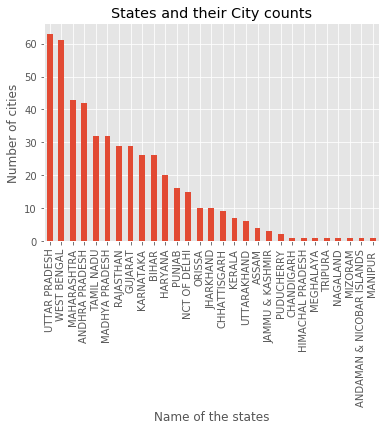

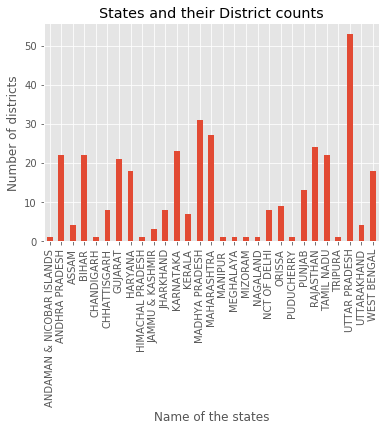


Surprisingly 1, 2, 3 are not the most common district numbers it's 11, 9 & 12

                  District Counts  Percentage Index
District Number                                   
11                            37              7.51
9                             26              5.27
12                            24              4.87
1                             22              4.46
3                             22              4.46
21                            21              4.26


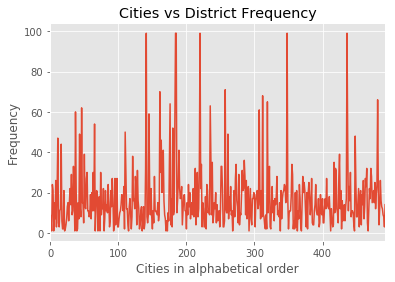

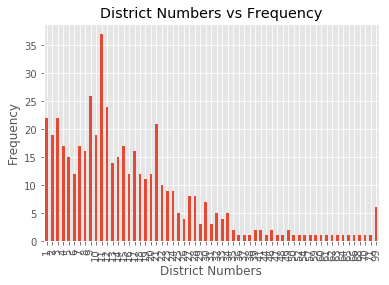


95.94 % of districts have their district numbers less than 50

Missing District numbers
[40, 42, 43, 45, 51, 53, 55, 56, 58, 67, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]

This shows that there are no district numbers from 72 to 98 and few numbers here and there in the 40s & 50s

Missing State Codes
[11, 12, 25, 26, 30, 31]


In [3]:
import pandas as pd
from matplotlib import pyplot as plt, style

#Cleaning and tinkering the dataset
def clean_tinker_table():
    
    #To remove the additional ' ', right after every city name
    table['name_of_city'] = table['name_of_city'].str.rstrip()

    #Creating a new column with the american notation of city, state
    table['Location'] = table['name_of_city'] + ', ' + table.state_name


def basic_observations():

    #Get the number of cities, states and the state has the most number of cities
    print('Number of cities: ', table.state_name.describe()[0])
    print('Number of states: ', table.state_code.nunique())
    print('Most number of cities are in the state: ', table.state_name.describe()[2])
    print('Number of cities over there: ', table.state_name.describe()[3])

    #Getting the states which hold the least number of cities
    print('Least number of cities belong to these states and their counts:')
    new_table = table.state_name.value_counts()
    print(new_table[ new_table == 1])

    #Printing the descritption of the dataframe 'table' according to dtype = 'object' and finding duplicates in terms of names
    print('\nLooking at the following table')
    print(table.describe(include = ['object']).iloc[2:4, 0])
    print('It shows that there are two Aurangabads and they are at:')
    print(table[table.Location.str.contains('Aurangabad')].Location)

    #Getting the number of cities in each state and plotting them
    #Pending how to show the numbers on top of the bar chart and extend so that the names don't go half hidden
    print('\nTop 5 States with the maximum number of Cities\n')
    print(table.state_name.value_counts().head())
    table.state_name.value_counts().plot(kind = 'bar'); plt.title('States and their City counts'); plt.xlabel('Name of the states'); plt.ylabel('Number of cities'); plt.show()

    #Getting the number of districts in each state and plotting them
    table.groupby('state_name').dist_code.nunique().plot(kind = 'bar'); plt.title('States and their District counts'); plt.xlabel('Name of the states'); plt.ylabel('Number of districts'); plt.show()

#Toying with the district number
def district_code_operations():

    print('\nSurprisingly 1, 2, 3 are not the most common district numbers it\'s 11, 9 & 12')

    d = {'District Counts':table.dist_code.value_counts().head(6),
       'Percentage Index': table.dist_code.value_counts(normalize=True).head(6)*100}
    #Changing the defualt setprecision value from 6 to 2
    pd.set_option('display.precision', 2)        
    df = pd.DataFrame(d)
    df.index.name = 'District Number'
    print('\n',df)

    #Plot that shows all the 493 cities and their district numbers
    table.dist_code.plot(); plt.title('Cities vs District Frequency'); plt.xlabel('Cities in alphabetical order'); plt.ylabel('Frequency'); plt.show() 

    #Plot that shows District numbers and their frequency
    table.dist_code.value_counts().sort_index().plot(kind='bar'); plt.title('District Numbers vs Frequency'); plt.xlabel('District Numbers'); plt.ylabel('Frequency'); plt.show()

    #To get the percentage of districts which have their number less than 50

    #indexsort_districtandcount is a Series where index values are from 1-99 and their respective column values are their counts in table.dist_code
    indexsort_districtandcount = table.dist_code.value_counts().sort_index()
    #reqd has the value of 'the index values (dist_code) going from 1-50's sum of those districts'
    reqd = indexsort_districtandcount.loc[1:50].sum()
    total_districtcount = table.dist_code.count()
    per50 = (reqd/total_districtcount)*100
    print('\n{0:4.2f}'.format(per50),'% of districts have their district numbers less than 50')

    #To find missing district numbers from 1 to 99
    print('\nMissing District numbers')
    #Not necessary but generator for numbers 1-99
    G1to99 = range(1,99)
    missing_districts = [check for check in G1to99 if check not in indexsort_districtandcount.index]
    print(missing_districts)
    print('\nThis shows that there are no district numbers from 72 to 98 and few numbers here and there in the 40s & 50s')

#Toying with state_code to find missing state_codes
def state_code_operations():
    
    print('\nMissing State Codes')
    missing_states = [check for check in range(1,35) if check not in table.state_code.value_counts().sort_index()]
    print(missing_states)

    
def main():

    style.use('ggplot')
    global table
    table = pd.read_csv('cities_r2.csv')
    clean_tinker_table()
    basic_observations()
    district_code_operations()
    state_code_operations()

if __name__ == '__main__':

    main()
        

else:

    print('The script is being borrowed')
